<a href="https://colab.research.google.com/github/cyruskimani/25052021/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Simple Difference in Outcomes

## A:Read in the dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load and read dataset
df = pd.read_csv('/content/drive/MyDrive/25052021/Copy of week_1_potential_outcomes.csv')
df.head()

,Unnamed: 0,near_chipotle,production_treatment,Y0,Y1
0,0,1,1,12.27,23.25
1,1,1,1,14.18,25.77
2,2,1,1,12.16,19.16
3,3,1,1,13.99,24.38
4,4,1,1,14.84,25.21


In [ ]:
#drop UNnames: 0 column
df.drop(['Unnamed: 0'],1, inplace=True)
df.head()

,near_chipotle,production_treatment,Y0,Y1
0,1,1,12.27,23.25
1,1,1,14.18,25.77
2,1,1,12.16,19.16
3,1,1,13.99,24.38
4,1,1,14.84,25.21


## B:Create a variable production_Y

In [ ]:
df['production_y'] = df[["Y0","Y1"]].mean(axis=1)

df.head()

,near_chipotle,production_treatment,Y0,Y1,production_y
0,1,1,12.27,23.25,17.760
1,1,1,14.18,25.77,19.975
2,1,1,12.16,19.16,15.660
3,1,1,13.99,24.38,19.185
4,1,1,14.84,25.21,20.025


In [ ]:
#dataset statistical summary
df.describe()

,near_chipotle,production_treatment,Y0,Y1,production_y
count,40.00000,40.00000,40.000000,40.000000,40.000000
mean,0.50000,0.50000,12.227500,17.385000,14.806250
std,0.50637,0.50637,2.341234,5.084314,3.589432
min,0.00000,0.00000,8.570000,8.300000,9.150000
25%,0.00000,0.00000,10.330000,13.467500,11.770000
50%,0.50000,0.50000,11.860000,16.830000,14.300000
75%,1.00000,1.00000,14.585000,21.457500,18.250000
max,1.00000,1.00000,16.640000,25.770000,20.780000


## C: Calculate the Simple Difference In Outcomes

In [ ]:
production_treatment_before = df.query("production_treatment	==0 & production_treatment	==0")["production_y"].mean()

production_treatment_after = df.query("production_treatment	==1 & production_treatment	==1")["production_y"].mean()

production_treatment_after - production_treatment_before

## D:Calculate the Selection Bias

In [ ]:
%pip install mlxtend --upgrade

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [ ]:
# estimate the bias and variance for a regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mlxtend
from mlxtend.evaluate import bias_variance_decomp

# separate into inputs and outputs
data = df.values
X, y = data[:, :-1], data[:, -1]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=42)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.000
Bias: 0.000
Variance: 0.000


## E:Calculate the Heterogeneous Treatment Effect Bias

In [ ]:
!pip install econml

In [ ]:
from econml.dml import SparseLinearDML
from sklearn.preprocessing import PolynomialFeatures
est = SparseLinearDML(featurizer=PolynomialFeatures(degree=4, include_bias=True))
T=df.production_y
y=df.production_treatment
X=df[['production_treatment','Y1','Y0']]
W = df[['Y1','Y0']]
est.fit(y, T, X=X, W=W)
lb, ub = est.const_marginal_effect_interval(X, alpha=.05)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00171195109058897, tolerance: 0.00039375
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028426326263093493, tolerance: 0.00039375
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035021319629531256, tolerance: 0.00039375
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011491916542254454, tolerance: 0.00039375
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016053104997031387, tolerance: 0.00039375
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018535453801264978, tolerance: 0.00039375
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001963048092901931, tolerance: 0.00039375
Objective did not converge. Yo

In [ ]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor
est = CausalForestDML(model_y=GradientBoostingRegressor(),
                model_t=GradientBoostingRegressor())
est.fit(y, T, X=X, W=W)
lb, ub = est.const_marginal_effect_interval(X, alpha=.05)

In [ ]:
lb

array([-0.01037174, -0.01037174, -0.01037174, -0.01037174, -0.01037174,
       -0.01037174, -0.01037174, -0.01037174, -0.01037174, -0.01037174,
       -0.01037174, -0.01037174, -0.01037174, -0.01037174, -0.01037174,
       -0.01037174, -0.01037174, -0.01037174, -0.01037174, -0.01037174,
       -0.01037174, -0.01037174, -0.01037174, -0.01037174, -0.01037174,
       -0.01037174, -0.01037174, -0.01037174, -0.01037174, -0.01037174,
       -0.01037174, -0.01037174, -0.01037174, -0.01037174, -0.01037174,
       -0.01037174, -0.01037174, -0.01037174, -0.01037174, -0.01037174])

In [ ]:
ub

array([0.03305488, 0.03305488, 0.03305488, 0.03305488, 0.03305488,
       0.03305488, 0.03305488, 0.03305488, 0.03305488, 0.03305488,
       0.03305488, 0.03305488, 0.03305488, 0.03305488, 0.03305488,
       0.03305488, 0.03305488, 0.03305488, 0.03305488, 0.03305488,
       0.03305488, 0.03305488, 0.03305488, 0.03305488, 0.03305488,
       0.03305488, 0.03305488, 0.03305488, 0.03305488, 0.03305488,
       0.03305488, 0.03305488, 0.03305488, 0.03305488, 0.03305488,
       0.03305488, 0.03305488, 0.03305488, 0.03305488, 0.03305488])

## F:Combine (C,D,E) to calculate the Average Treatment Effect

In [ ]:
import patsy
# some data prep for later
formula = """
production_y ~ production_y +	Y0 + Y1
"""
production_y, X = patsy.dmatrices(formula, df, return_type="dataframe")
# some categories are empty after dropping rows will Null, drop now
X = X.loc[:, X.sum() > 0]
production_treatment = production_y.iloc[:, 0]
treatment_variable = "production_y"
treatment = X["production_y"]
Xl = X.drop([ "production_y"], axis=1)
#scale = bw.std()
#center = bw.mean()
loc_id = df.loc[X.index, "production_treatment"].astype("category")

import re
# remove [ ] from names for compatibility with xgboost
Xl = Xl.rename(columns=lambda x: re.sub('\[|\]','_',x))

In [ ]:
# Estimate average treatment effects
from statsmodels.iolib.summary2 import summary_col
tmp = pd.DataFrame(dict(birthweight=production_treatment,treatment=treatment,assisted_delivery=df.loc[X.index, "production_treatment"]))
usage = smf.ols("assisted_delivery ~ treatment", data=tmp).fit(cov_type="cluster", cov_kwds={'groups':loc_id})
health= smf.ols("production_y ~ treatment", data=tmp).fit(cov_type="cluster", cov_kwds={'groups':loc_id})
summary_col([usage, health])

,assisted_delivery,production_y
Intercept,-1.3779,0.0000
,(0.1823),(0.0000)
treatment,0.1268,1.0000
,(0.0058),(0.0000)


# Problem 2: Simulate an Experiment

## A: Create a new variable experiment_treatment

In [ ]:
# df['experiment_treatment'] = (-df.production_treatment.isin(range(0,1))).astype(int)
# df
from pandas import DataFrame
from numpy.random import randint
df['experiment_treatment'] = randint(2, size=40)
df.head()

,near_chipotle,production_treatment,Y0,Y1,production_y,experiment_treatment
0,1,1,12.27,23.25,17.760,1
1,1,1,14.18,25.77,19.975,0
2,1,1,12.16,19.16,15.660,1
3,1,1,13.99,24.38,19.185,0
4,1,1,14.84,25.21,20.025,1


## B: Create a new variable experiment_y

In [ ]:
import random
df['experiment_y']= np.random.randint(9.0,21.0, size=len(df))
df.head()

,near_chipotle,production_treatment,Y0,Y1,production_y,experiment_treatment,experiment_y,permuted_treatment
0,1,1,12.27,23.25,17.760,1,13,1
1,1,1,14.18,25.77,19.975,0,11,1
2,1,1,12.16,19.16,15.660,1,13,1
3,1,1,13.99,24.38,19.185,0,16,0
4,1,1,14.84,25.21,20.025,1,14,0


## C: Calculate the average treatment effect

In [ ]:
import patsy
from sklearn import linear_model, ensemble, base, neural_network
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some data prep for later
formula = """
production_y ~ experiment_treatment +	experiment_y

"""
production_y, X = patsy.dmatrices(formula, df, return_type="dataframe")
# some categories are empty after dropping rows will Null, drop now
X = X.loc[:, X.sum() > 0]
production_y = production_y.iloc[:, 0]
treatment_variable = "experiment_y"
treatment = X["experiment_y"]
Xl = X.drop([ "experiment_y"], axis=1)
#scale = bw.std()
#center = bw.mean()
loc_id = df.loc[X.index, "experiment_treatment"].astype("category")

import re
# remove [ ] from names for compatibility with xgboost
Xl = Xl.rename(columns=lambda x: re.sub('\[|\]','_',x))

In [ ]:
# Estimate average treatment effects
from statsmodels.iolib.summary2 import summary_col
tmp = pd.DataFrame(dict(birthweight=production_y,treatment=treatment,assisted_delivery=df.loc[X.index, "experiment_y"]))
usage = smf.ols("assisted_delivery ~ treatment", data=tmp).fit(cov_type="cluster", cov_kwds={'groups':loc_id})
health= smf.ols("production_y ~ treatment", data=tmp).fit(cov_type="cluster", cov_kwds={'groups':loc_id})
summary_col([usage, health])

,assisted_delivery,production_y
Intercept,0.0000,19.7702
,(0.0000),(3.6564)
treatment,1.0000,-0.3453
,(0.0000),(0.2417)



Problem 3: Permutation Testing

A: Create a new variable permuted_treatement with a 50% of being treated and a 50% chance of not being treated



In [ ]:
# df
from pandas import DataFrame
from numpy.random import randint
df['permuted_treatment'] = randint(2, size=40)
df.head()

,near_chipotle,production_treatment,Y0,Y1,production_y,experiment_treatment,experiment_y,permuted_treatment
0,1,1,12.27,23.25,17.760,1,10,1
1,1,1,14.18,25.77,19.975,0,11,1
2,1,1,12.16,19.16,15.660,1,9,1
3,1,1,13.99,24.38,19.185,0,11,0
4,1,1,14.84,25.21,20.025,1,14,0


B. Sharp Null Hypothesis.

Experiment y

In [ ]:
import random
df['experiment_y']= np.random.randint(0.0,1.0, size=len(df))
df.head()

,near_chipotle,production_treatment,Y0,Y1,production_y,experiment_treatment,experiment_y,permuted_treatment
0,1,1,12.27,23.25,17.760,1,0,1
1,1,1,14.18,25.77,19.975,0,0,1
2,1,1,12.16,19.16,15.660,1,0,1
3,1,1,13.99,24.38,19.185,0,0,0
4,1,1,14.84,25.21,20.025,1,0,0


In [ ]:
# some data prep for later
formula = """
production_y ~ permuted_treatment +	experiment_y

"""
production_y, X = patsy.dmatrices(formula, df, return_type="dataframe")
# some categories are empty after dropping rows will Null, drop now
X = X.loc[:, X.sum() > 0]
production_y = production_y.iloc[:, 0]
treatment_variable = "experiment_y"
treatment = X["experiment_y"]
Xl = X.drop([ "experiment_y"], axis=1)
#scale = bw.std()
#center = bw.mean()
loc_id = df.loc[X.index, "experiment_treatment"].astype("category")

import re
# remove [ ] from names for compatibility with xgboost
Xl = Xl.rename(columns=lambda x: re.sub('\[|\]','_',x))

In [ ]:
# Estimate average treatment effects
from statsmodels.iolib.summary2 import summary_col
tmp = pd.DataFrame(dict(birthweight=production_y,treatment=treatment,assisted_delivery=df.loc[X.index, "experiment_y"]))
usage = smf.ols("assisted_delivery ~ treatment", data=tmp).fit(cov_type="cluster", cov_kwds={'groups':loc_id})
health= smf.ols("production_y ~ treatment", data=tmp).fit(cov_type="cluster", cov_kwds={'groups':loc_id})
summary_col([usage, health])

,assisted_delivery,production_y
Intercept,-0.0000,18.5975
,(0.0000),(1.2130)
treatment,1.0000,-0.2557
,(0.0000),(0.0781)


C: Repeat this 1000 times. What is the average of the simulated average treatment effect under the null hypothesis. Plot a histogram of the outcomes

In [ ]:
#production_y ~ permuted_treatment +	experiment_y
df['outcomes']=production_y
df.head()

,near_chipotle,production_treatment,Y0,Y1,production_y,experiment_treatment,experiment_y,permuted_treatment,outcomes
0,1,1,12.27,23.25,17.760,1,13,1,17.760
1,1,1,14.18,25.77,19.975,0,11,1,19.975
2,1,1,12.16,19.16,15.660,1,13,1,15.660
3,1,1,13.99,24.38,19.185,0,16,0,19.185
4,1,1,14.84,25.21,20.025,1,14,0,20.025


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf4595c950>]],
      dtype=object)

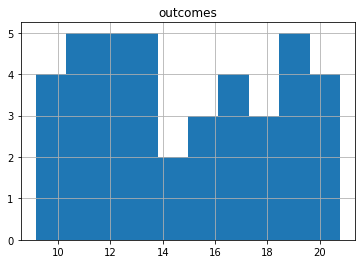

In [ ]:
df.hist(column='outcomes')